# Task 4: Loan Approval Prediction

### Covered Topics
Multi-class classification | Tree-based modeling

### Dataset
Loan-Approval-Prediction-Dataset (Kaggle)

### Description:
1. Dataset (Recommended): Loan-Approval-Prediction-Dataset (Kaggle).
2. Build a model to predict whether a loan application will be approved.
3. Handle missing values and encode categorical features.
4. Train a classification model and evaluate performance on imbalanced data.
5. Focus on precision, recall, and F1-score.

Imports

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,classification_report,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

Load Dataset

In [2]:
data = pd.read_csv('/Users/ahmedyahia/Downloads/welcometotheelevvointernshipprogram/datasets/loan_approval_dataset.csv')
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Understaning Data

In [3]:
data.info()
data.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


(4269, 13)

Data Summary

In [4]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


Missing Data (Data Cleaning)

In [5]:
data.isna().sum().sum()
print(f'Missing data percentage: {100 - (data.shape[0]-data.isna().sum().sum())/data.shape[0]*100:.2f}%')

Missing data percentage: 0.00%


Data visualisation

In [6]:
numerical_data = data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", len(numerical_data))
categorical_data = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", len(categorical_data))

Numerical Columns: 10
Categorical Columns: 3


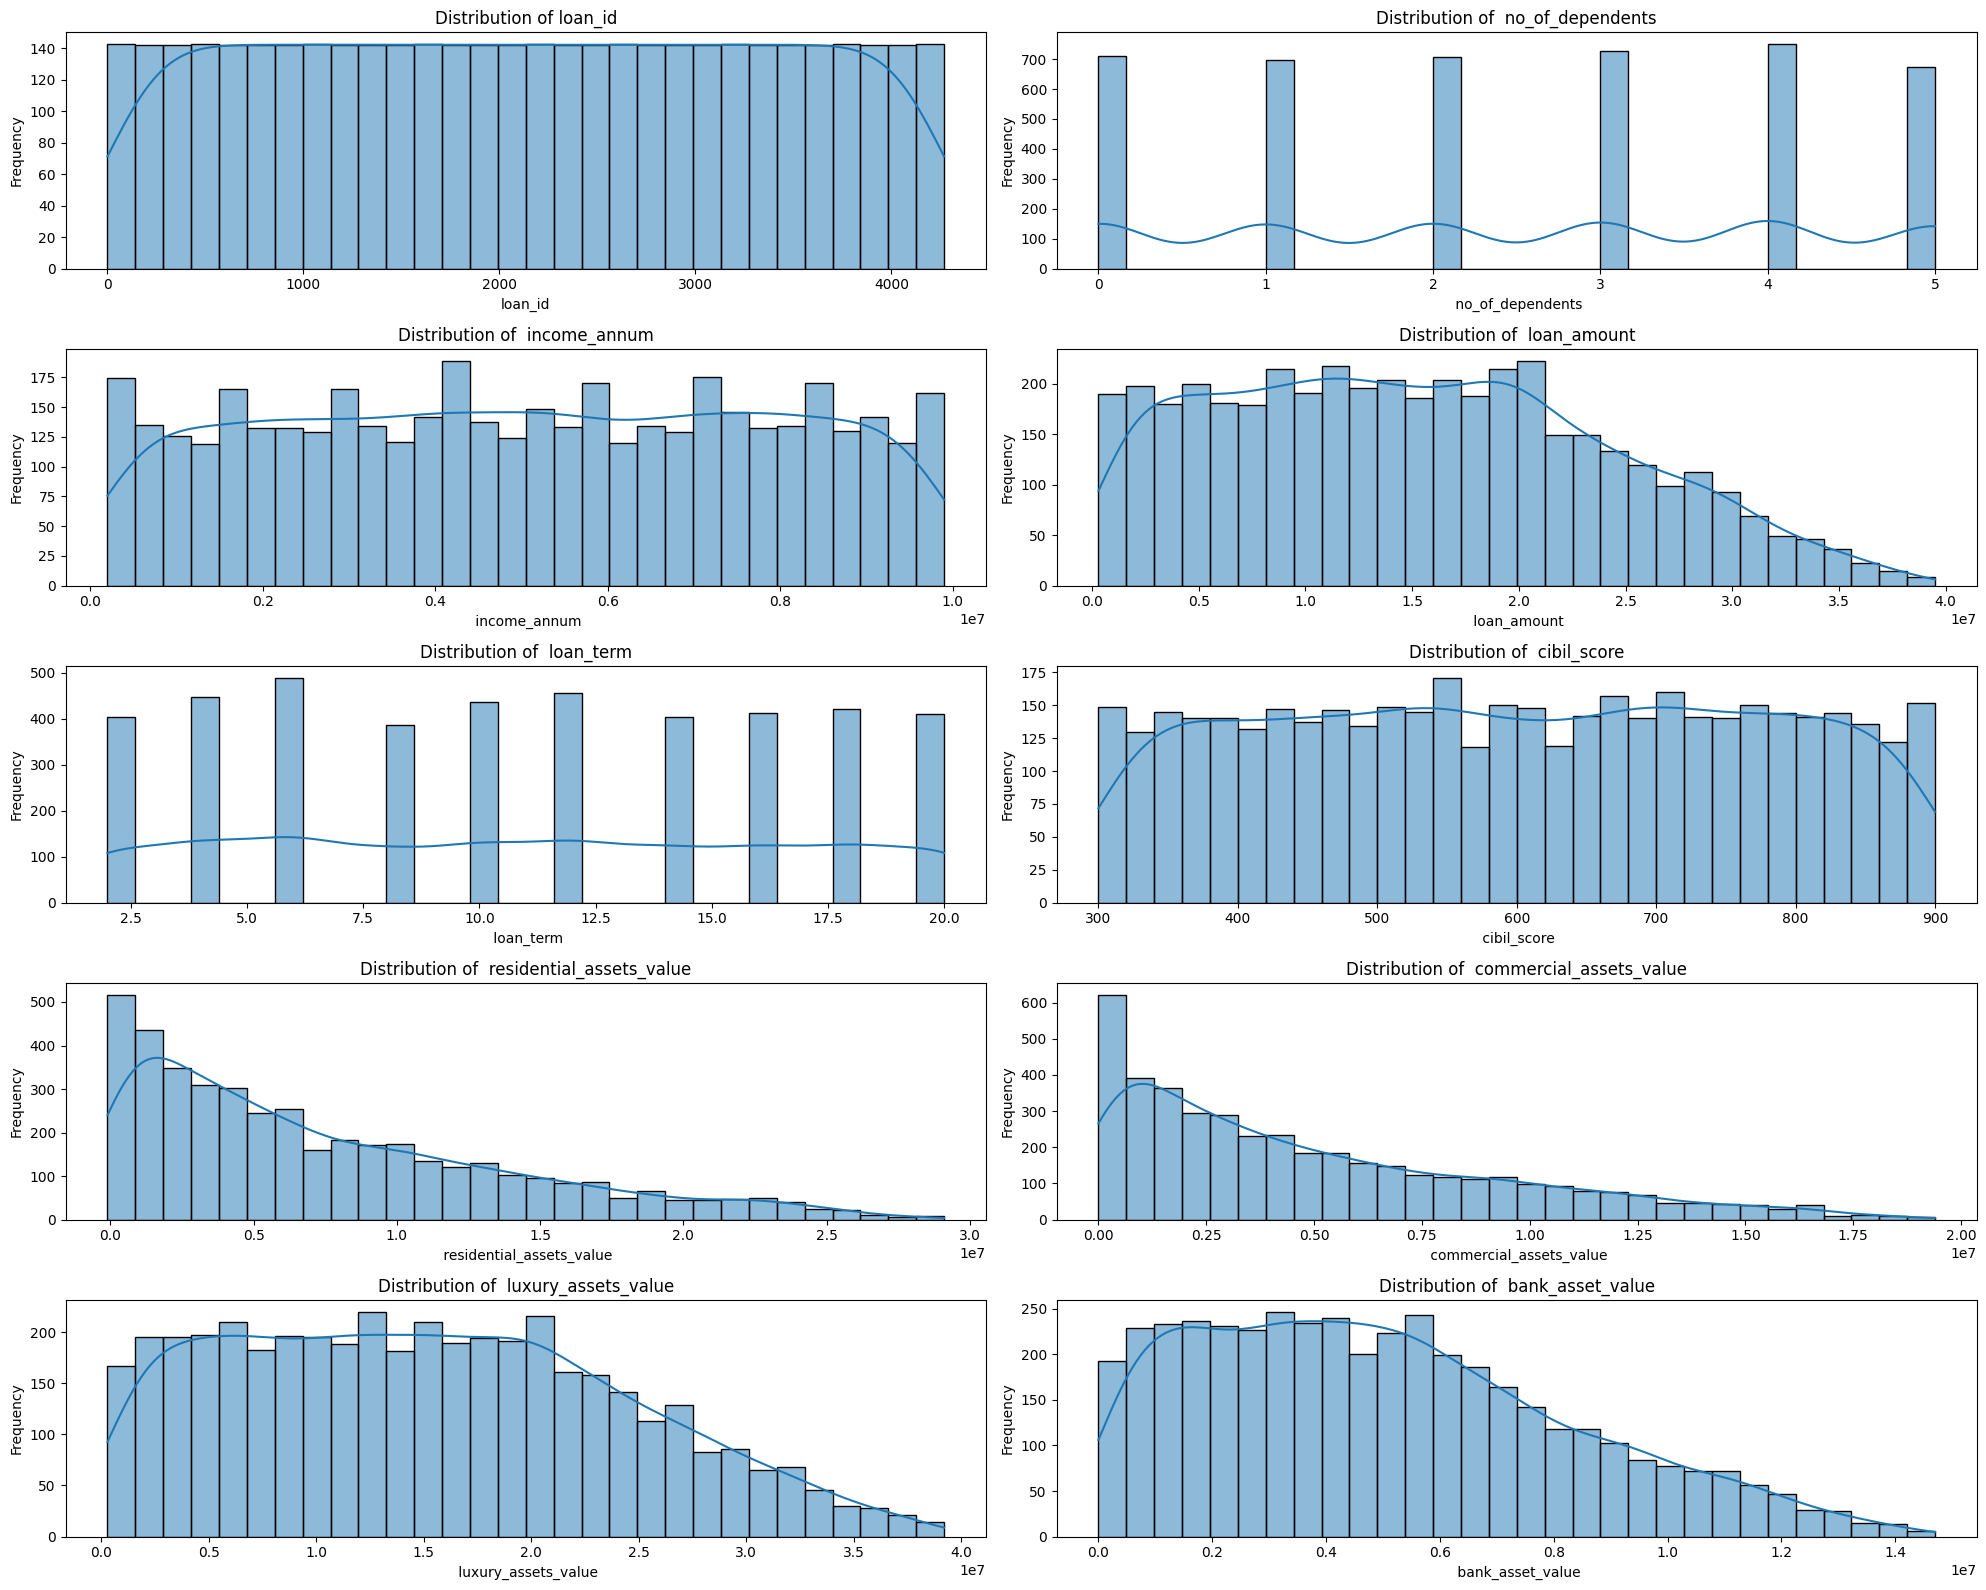

In [9]:
fig, ax = plt.subplots(5,2, figsize=(20, 16))
ax = ax.flatten()  # Flatten to 1D for easy indexing

# Distribution Plots
for i, col in enumerate(numerical_data):
    sns.histplot(data[col], bins=30, kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

/var/folders/f0/_2m5m3_d0b502chmqj_qdrb80000gn/T/ipykernel_1145/3586000130.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, ax=ax[i], palette=palette)
/var/folders/f0/_2m5m3_d0b502chmqj_qdrb80000gn/T/ipykernel_1145/3586000130.py:5: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, ax=ax[i], palette=palette)
/var/folders/f0/_2m5m3_d0b502chmqj_qdrb80000gn/T/ipykernel_1145/3586000130.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, ax=ax[i], palette=palette)
/var/folders/f0/_2m5m3_d0b502chmqj_qdrb80000gn/T/ipykernel_1145/3586000130.py:5: UserWarning: The palette list has

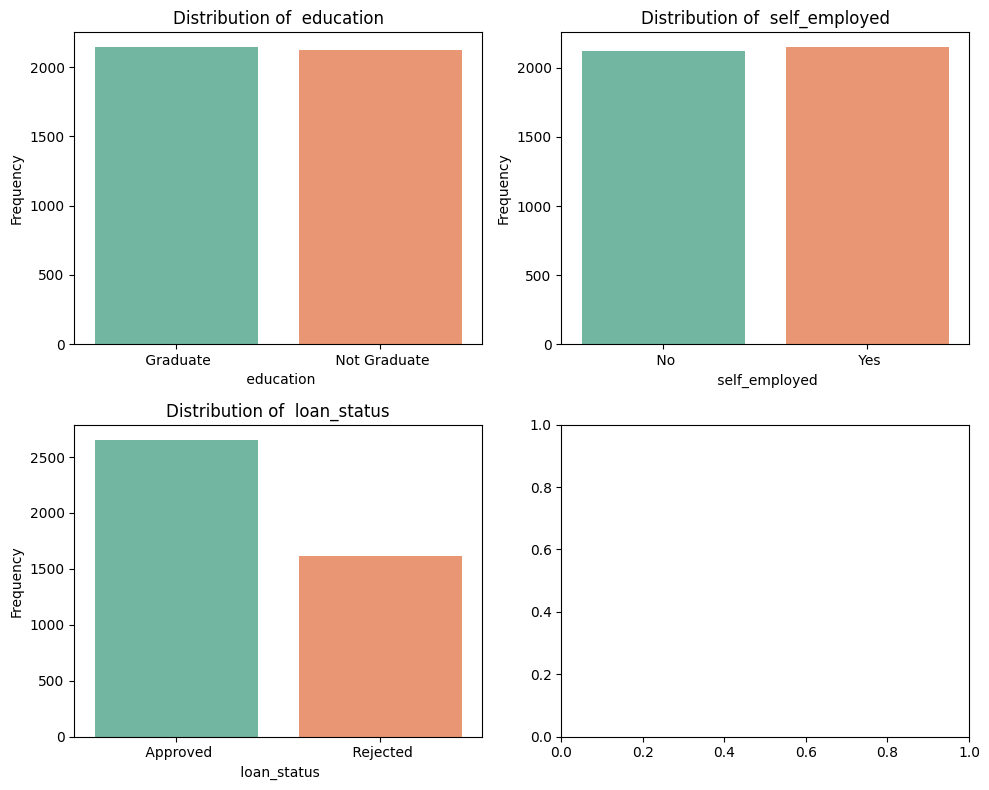

In [11]:
fig, ax = plt.subplots(2,2, figsize=(10, 8))
ax = ax.flatten()  # Flatten to 1D for easy indexing
palette = sns.color_palette('Set2')
for i, col in enumerate(categorical_data):
    sns.countplot(data=data, x=col, ax=ax[i], palette=palette)
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Convert Categorical to numerical

In [12]:
le = LabelEncoder()
for col in categorical_data:
    data[col] = le.fit_transform(data[col])
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


Identify outliers

Number of outlier rows using IQR: 91


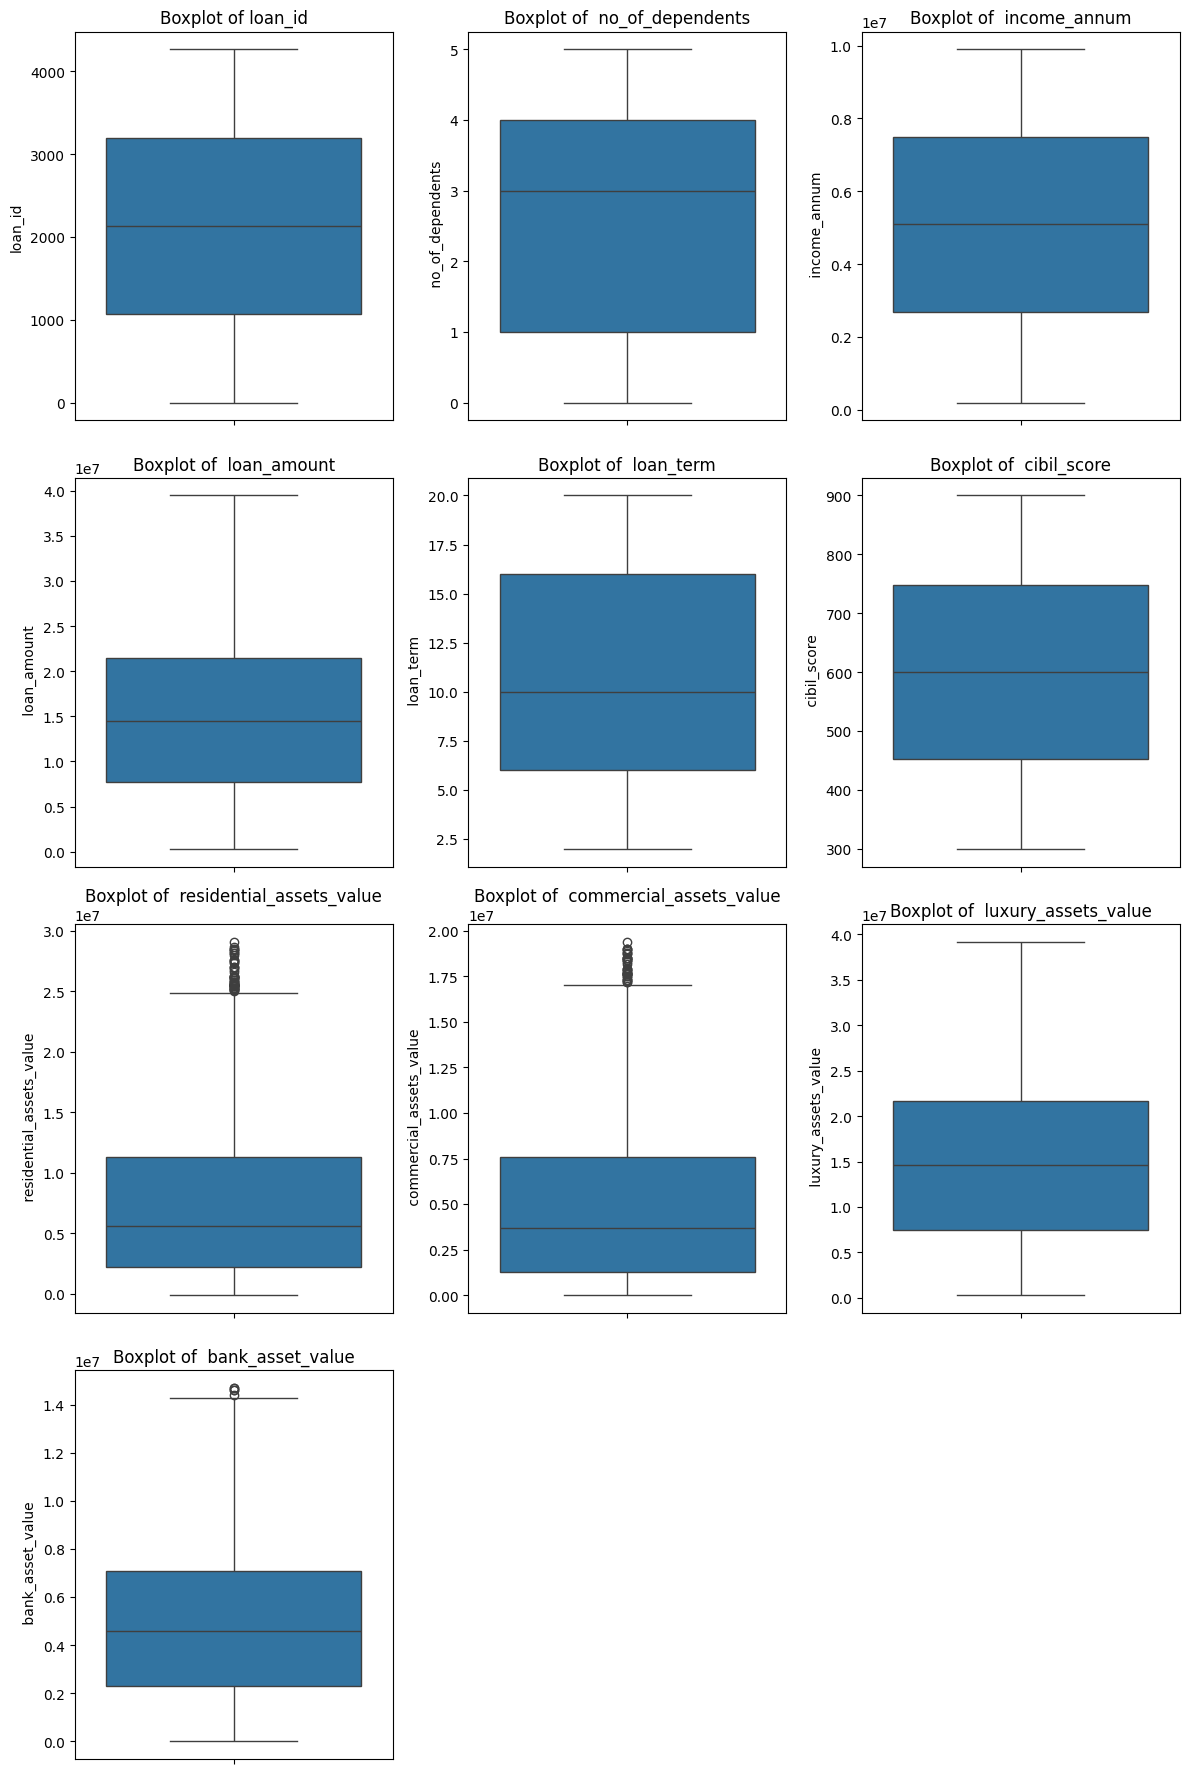

In [17]:
Q1 = data[numerical_data].quantile(0.25)
Q3 = data[numerical_data].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ((data[numerical_data] < (Q1 - 1.5 * IQR)) | (data[numerical_data] > (Q3 + 1.5 * IQR)))
outliers_iqr = outlier_condition.any(axis=1)
print(f'Number of outlier rows using IQR: {np.sum(outliers_iqr)}')

# Create grid of subplots
fig, ax = plt.subplots(4, 3, figsize=(12, 18))
ax = ax.flatten()

# Generate one boxplot per numerical feature
for i, col in enumerate(numerical_data):
    sns.boxplot(y=data[col], ax=ax[i])
    ax[i].set_title(f'Boxplot of {col}')
    ax[i].set_ylabel(col)

# Hide any unused subplots
for j in range(len(numerical_data), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

Data Splitting

In [20]:
# Original Data
X = data.drop(columns=['loan_id', ' loan_status'])
y = data[' loan_status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


Multi-class Classification Models

In [22]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
model3 = LogisticRegression()
model3.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluation

In [25]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

In [26]:
print(f'Decision Tree Accuracy: {accuracy_score(y_test,y_pred1)*100:.2f}%')
print(f'Random Forest Accuracy: {accuracy_score(y_test,y_pred2)*100:.2f}%')
print(f'Logistic Regression Accuracy: {accuracy_score(y_test,y_pred1)*100:.2f}%')


Decision Tree Accuracy: 97.50%
Random Forest Accuracy: 98.13%
Logistic Regression Accuracy: 97.50%


Confusion Matrix

In [27]:
cm1 = confusion_matrix(y_test,y_pred1)
cm2 = confusion_matrix(y_test,y_pred2)
cm3 = confusion_matrix(y_test,y_pred3)

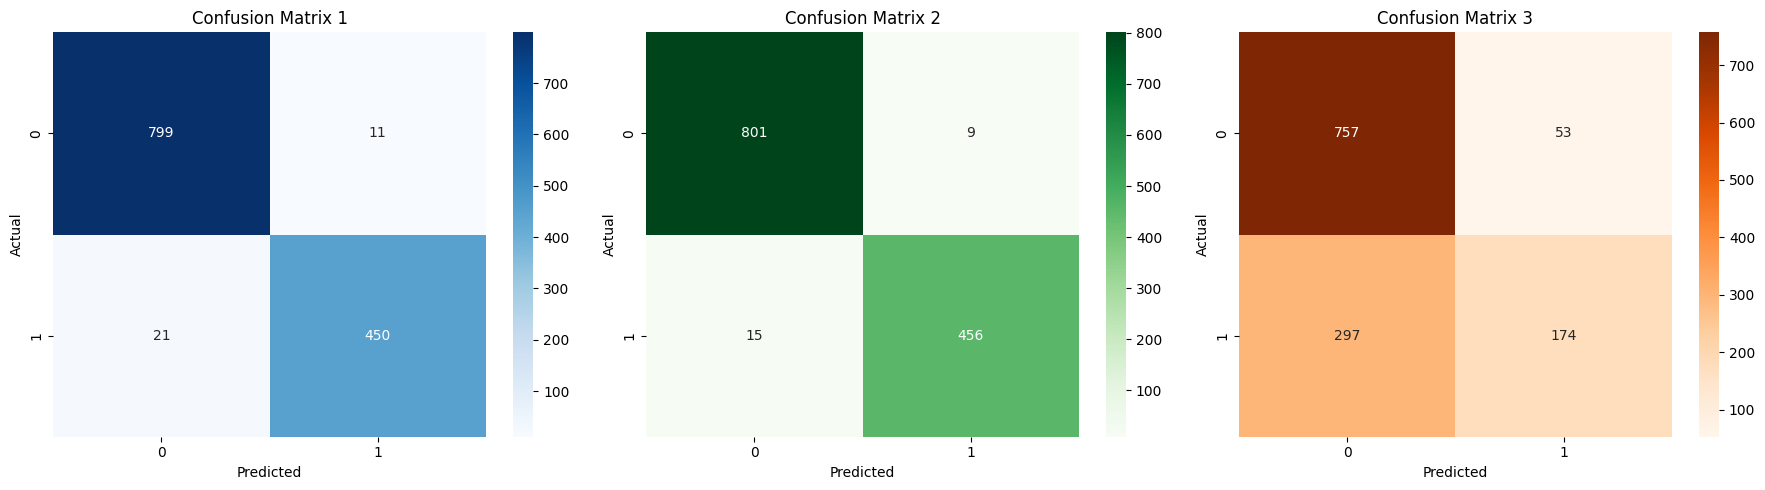

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix 1")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Confusion Matrix 2")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm3, annot=True, fmt="d", cmap="Oranges", ax=axes[2])
axes[2].set_title("Confusion Matrix 3")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

Classification Report

In [29]:
print('Decision Tree Classification Report:\n ',classification_report(y_test,y_pred1))
print('Random Forest Classification Report:\n',classification_report(y_test,y_pred2))
print('Logistic Regression Classification Report:\n',classification_report(y_test,y_pred3))

Decision Tree Classification Report:
                precision    recall  f1-score   support

           0       0.97      0.99      0.98       810
           1       0.98      0.96      0.97       471

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.97      1281
weighted avg       0.98      0.98      0.97      1281

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       810
           1       0.98      0.97      0.97       471

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.93      0.81       810
           1       0.77      0.37      0.50       471

    accuracy                           0.73      1281
   macr

Precision

In [30]:
print(f'Decision Tree Precision: {precision_score(y_test,y_pred1)*100:.2f}%')
print(f'Random Forest Precision: {precision_score(y_test,y_pred2)*100:.2f}%')
print(f'Logistic Regression Precision: {precision_score(y_test,y_pred1)*100:.2f}%')


Decision Tree Precision: 97.61%
Random Forest Precision: 98.06%
Logistic Regression Precision: 97.61%


Recall

In [31]:
print(f'Decision Tree Recall: {recall_score(y_test,y_pred1)*100:.2f}%')
print(f'Random Forest Recall: {recall_score(y_test,y_pred2)*100:.2f}%')
print(f'Logistic Regression Recall: {recall_score(y_test,y_pred1)*100:.2f}%')


Decision Tree Recall: 95.54%
Random Forest Recall: 96.82%
Logistic Regression Recall: 95.54%


F1-Score

In [32]:
print(f'Decision Tree F1-Score: {f1_score(y_test,y_pred1)*100:.2f}%')
print(f'Random Forest F1-Score: {f1_score(y_test,y_pred2)*100:.2f}%')
print(f'Logistic Regression F1-Score: {f1_score(y_test,y_pred1)*100:.2f}%')


Decision Tree F1-Score: 96.57%
Random Forest F1-Score: 97.44%
Logistic Regression F1-Score: 96.57%
